In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("Codis_v5.ipynb")

# CODIS: Analyzing STR Profiles and DNA Forensics
### Data Science for Biology

**Notebook developed by:** *Shishi Luo, Sarp Dora Kurtoglu, Kinsey Long*<br>
**Supervised by:** *Steven Brenner*<br>

### Learning Outcomes

In this notebook, you will learn about and practice:
* Intermediate Pandas methods
* Seaborn histograms
* Probability
* Nested for loops
* STRs used for forensics in CODIS

---
### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook:

- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Conditional Probability with Khan Academy](https://www.khanacademy.org/math/ap-statistics/probability-ap/stats-conditional-probability/v/bayes-theorem-visualized)

### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource. Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

For this assignment, we will primarily be using the 'pandas' library. 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print("All necessary packages have been imported!")

All necessary packages have been imported!


## Background
FBI uses a system called CODIS (Combined DNA Index System) to help support and solve criminal cases. The DNA Profile of a suspect is compared against large DNA databases to look for a match. These profiles are determined by DNA Short tandem repeat (STR) Analysis with information about allele(s) at the 20 CODIS Core Loci. 

The FBI FAQ about these is [here.](https://www.fbi.gov/resources/dna-fingerprint-act-of-2005-expungement-policy/codis-and-ndis-fact-sheet)<br>
A description of how these are used is [here.](https://www.nature.com/scitable/topicpage/forensics-dna-fingerprinting-and-codis-736)

Until December 31, 2016, there were 13 CODIS Core Loci:

CSF1PO, FGA, THO1, TPOX, VWA, D3S1358, D5S818, D7S820, D8S1179, D13S317, D16S539, D18S51, D21S11

Later on, 7 more were added, to create a set of 20 CODIS Core Loci:

CSF1PO, FGA, THO1, TPOX, VWA, D3S1358, D5S818, D7S820, D8S1179, D13S317, D16S539, D18S51, D21S11, D1S1656, D2S441, D2S1338, D10S1248, D12S391, D19S433, D22S1045

In this assignment, we will be using a small set of CODIS data.


## Import the Data

Let's read the raw data in comma separated values format, collected by NIST (National Institute of Standards and Technology) which you can find in the `Data` folder under the name `CODIS_profiles.csv`.  

In [4]:
#Just run this cell
raw_profiles = pd.read_csv("data/CODIS_profiles.csv")
raw_profiles.head()

,Group,SampleCode,AMEL,AMEL.1,CSF1PO,CSF1PO.1,D10S1248,D10S1248.1,D12S391,D12S391.1,...,DYS456,DYS458,DYS481,DYS533,DYS549,DYS570,DYS576,DYS635,DYS643,Y-GATA-H4
0,Cauc,BC11352,X,Y,11,13,13,15,17.0,18.0,...,15,18,23,12,13,16,19,20,9,12
1,Hisp,GA05070,X,Y,10,12,12,14,17.3,23.0,...,17,15,25,11,12,16,17,22,11,12
2,Hisp,GA05071,X,Y,11,15,14,16,19.0,20.0,...,15,16,22,12,13,18,18,23,10,12
3,Cauc,GC03394,X,Y,10,12,15,16,19.0,19.0,...,13,16,22,12,13,18,16,21,9,11
4,Cauc,GT36864,X,Y,10,12,15,17,17.3,20.0,...,14,15,24,11,13,20,16,21,12,11


This is an example DNA database used by the FBI. The first row contains headings, including the names of all 20 CODIS Core Loci. Each row after the first one corresponds to an individual and their unique counts for each of the CODIS Core Locus. The alleles here refer to the number of STR repeats in each CODIS Core Loci. Most loci are named as XXXX and XXXX.1. These represent the same locus on the homologous chromosomes. Considering both represents diploid characteristics. For example, the first individual in the dataset has 11 for CSF1PO and 13 for CSF1PO.1. This means that on one chromosome they have 11 repeats at the CSF1PO locus, while on the other chromosome they have 13 repeats at the CSF1PO locus.  Each allele at a locus is named by the number of short tandem repeats; e.g., 6 repeats would be called "allele 6."  (This might seem obvious, but often alleles are named in different ways.) By convention, the smaller number of STR counts is in the XXXX column, and the larger number of STR counts is in the XXXX.1 column.

## Restricting to CODIS original core loci
For this part of the project, we're just going to use the original 13 CODIS loci: TPOX, D3S1358, FGA, D5S818, CSF1PO, D7S820, D8S1179, TH01, VWA, D13S317, D16S539, D18S51, D21S11.

To keep things simple for this part of the lab, we will be considering only one allele from each person, by ignoring the columns with name of the form XXXXXXX.1. We'll also ignore the first two columns which contain ethnic information and the unique identifier.

<font color = #d14d0f>**QUESTION 1**:</font> Create a new DataFrame `CODIS_profiles` which contains data for only the 13 CODIS core loci of each individual. Use the list `CODIS_13_loci`, which contains all 13 STR loci used for DNA fingerprinting as described below, in your code for creating the table. 

In [5]:
CODIS_13_loci = ['TPOX', 'D3S1358', 'FGA', 'D5S818', 
            'CSF1PO', 'D7S820', 'D8S1179', 'TH01', 'vWA',
            'D13S317', 'D16S539', 'D18S51', 'D21S11']

CODIS_profiles = raw_profiles[CODIS_13_loci]

CODIS_profiles.head() #DO NOT CHANGE THIS LINE

,TPOX,D3S1358,FGA,D5S818,CSF1PO,D7S820,D8S1179,TH01,vWA,D13S317,D16S539,D18S51,D21S11
0,8,14.0,24.0,10,11,10.0,13,6.0,17,13,8,13.0,28.0
1,8,16.0,25.0,11,10,10.0,10,7.0,14,10,10,16.0,30.0
2,8,14.0,23.0,11,11,7.0,13,7.0,16,11,12,17.0,30.2
3,8,15.0,21.0,11,10,11.0,12,6.0,17,11,12,15.0,30.0
4,9,15.0,19.0,9,10,8.0,13,7.0,16,11,11,14.0,31.2


In [6]:
grader.check("q1")

q1 results: All test cases passed!

## Exploration and Visualization
The following code plots the distribution of the STR counts for the locus 'TPOX' using the `seaborn` package, abbreviated as `sns`. You can read the documentation for the `sns.histplot(data)` method [here](https://seaborn.pydata.org/generated/seaborn.histplot.html).

In Data 8, we plotted a histogram using `Table.hist(column_label)`. The primary difference for the seaborn histplot is the way the dataframe is input as a parameter, instead of the visualization function being called on the Table object.

An important note is that STR count is a discrete variable, not continuous. Therefore, it is important that we include the `discrete = True` parameter, which centers our x-axis values under the bar.

Text(0, 0.5, 'Number of Individuals')

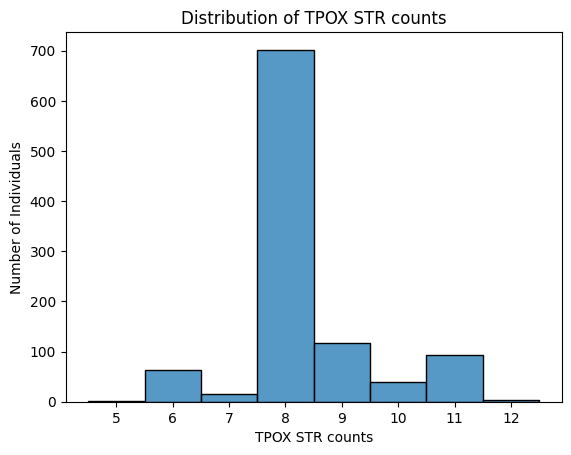

In [7]:
#Just run this cell
ax = sns.histplot(CODIS_profiles, x = "TPOX", discrete=True)
ax.set_title("Distribution of TPOX STR counts")
ax.set_xlabel("TPOX STR counts")
ax.set_ylabel("Number of Individuals")

You'll see that the values (the alleles in this case) range from 6 to 11 with a peak at 8. This means that within the population in our DNA dataset, having 8 counts at the TPOX CODIS Core locus is the most common case.

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 2**:</font> Fill in the code below to create separate bar charts for each CODIS locus, including TPOX, to get a sense of the allelic variation and how concentrated the distributions might be. Make sure each bar chart has an appropriate title and axis labels.
>Hint: You can use [f-strings](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/) to substitute variables within strings.
>Hint: You can use [sns.FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to create subplots.


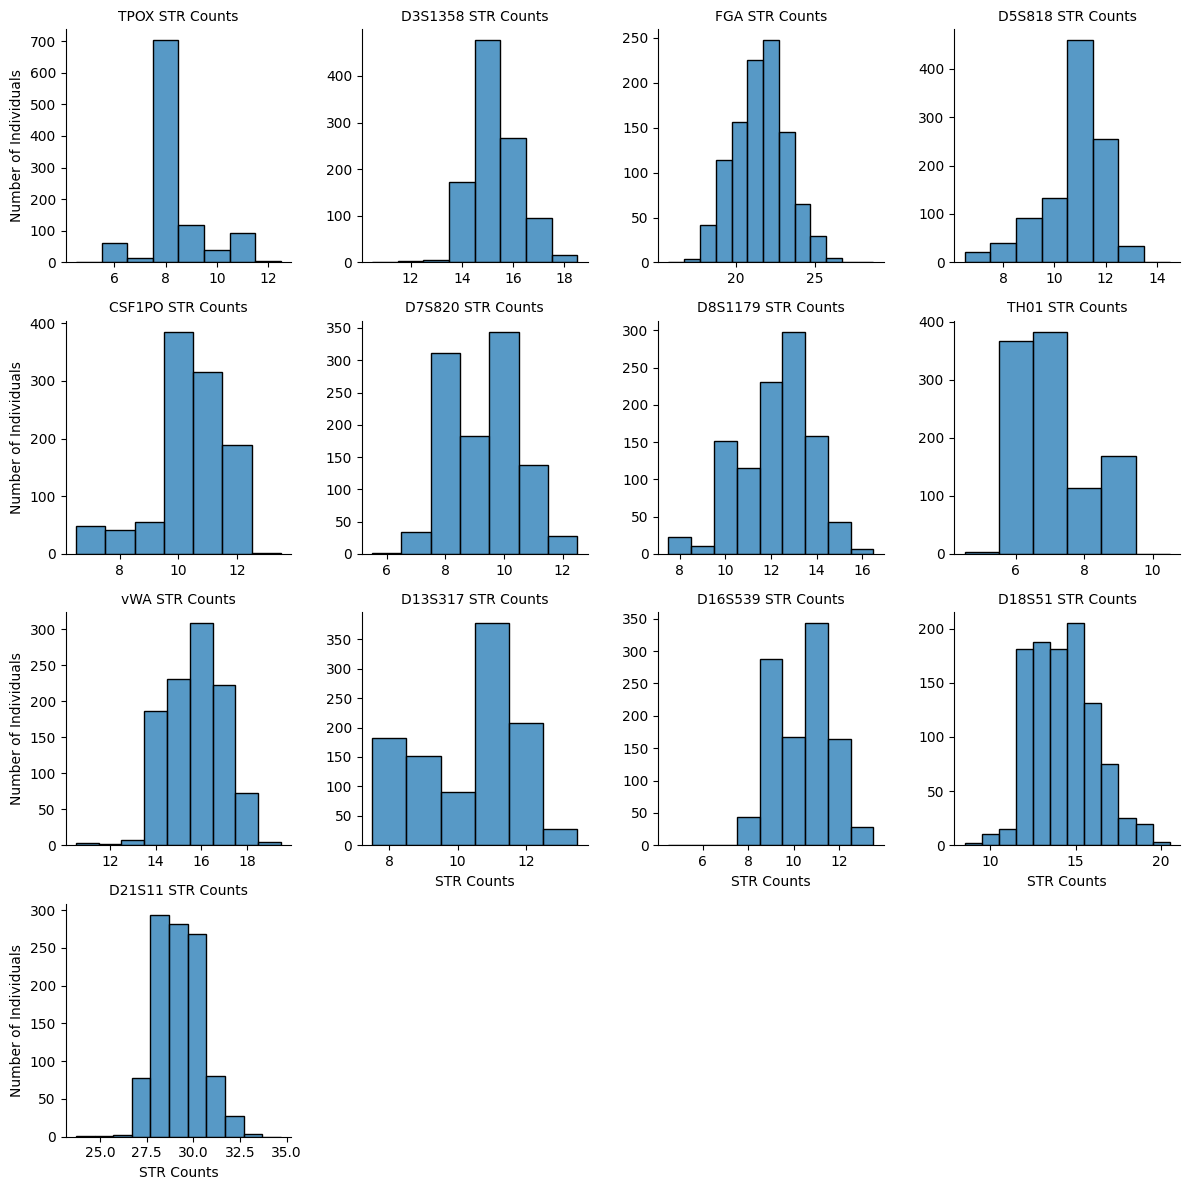

In [8]:

# Reshape data into long format
df_long = CODIS_profiles.melt(var_name="Locus", value_name="STR Count")

# Create FacetGrid for subplots
g = sns.FacetGrid(df_long, col="Locus", col_wrap=4, sharex=False, sharey=False)

# Map histograms to each facet
g.map_dataframe(sns.histplot, x="STR Count", discrete=True)

# Adjust titles
g.set_titles(col_template="{col_name} STR Counts")

# Adjust labels
g.set_axis_labels("STR Counts", "Number of Individuals")



<!-- END QUESTION -->

## Upper Bound on the Match Probability
The distribution of alleles for each STR locus in the law enforcement sample is not representative of the entire United States population. When we think about how this data was gathered, only individuals who had crossed paths with the law could have provided sample DNA to build the database. It is fair to assume that there most likely are certain groups that were compelled to provide samples at greater or lesser frequencies contributing to the DNA database. 

However, in an hypothetical situation, if we were to assume that the distribution of alleles for each STR locus in this sample is representative of the population, we can use it to estimate the probability that a suspect's DNA matches the DNA at the crime scene just by chance, when considering only the shorter TPOX STR allele.

Under that hypothetical situation, if we drew individuals at random from the population, it would be reasonable to expect that their alleles for the 'TPOX' STR locus would be distributed approximately as shown below.

The code below is the Pandas equivalent to the Data 8 `Table.group()` method.



In [9]:
#Just run this cell
tpox_counts = CODIS_profiles.groupby('TPOX').agg("count").iloc[:, [0]].rename({"D3S1358": "count"}, axis=1)
tpox_counts

,count
TPOX,
5,1
6,63
7,15
8,702
9,118
10,39
11,94
12,4


The probability that a random individual has a specific allele "x" for a STR locus would be: <br>
(number of people with allele "x" in sample) / (number of people in sample) 

For example, the most common TPOX allele, allele 8, would be calculated like so:

In [10]:
#Just run this cell
np.round(tpox_counts.iloc[:, 0].sort_values(ascending=False).iloc[0] / sum(tpox_counts.iloc[:, 0]), 3)

0.678

<font color = #d14d0f>**QUESTION 3a**:</font> Suppose that the DNA fingerprint at a crime scene has the most common allele in each of the 13 STR locus in the CODIS set. Assign the probability that a randomly drawn individual would match to the variable `probability_most_common`.

>Note: For this question, and throughout, assume that the probability of having a certain allele at any STR loci is independent of one another. You do not have to follow the skeleton code provided.

In [11]:
# Question 3a
probability_most_common = 1 
for locus in CODIS_13_loci:
    # First get a frequency table for each locus
    frequency_df = CODIS_profiles.groupby(locus).agg("count").iloc[:, [0]].rename({CODIS_13_loci[0]: "count"}, axis=1)
    # then using the method described in the prev scell, calculate the probability of the most common allele for each locus
    prob_of_locus = np.round(frequency_df.iloc[:, 0].sort_values(ascending=False).iloc[0] / sum(frequency_df.iloc[:, 0]), 3)
    probability_most_common *= prob_of_locus

#Do not change this code
print(f"The probability of a random individual having the most common allele for all 13 STR loci is {probability_most_common:.2e}.")

The probability of a random individual having the most common allele for all 13 STR loci is 8.34e-07.


In [12]:
grader.check("q3a")

q3a results: All test cases passed!

<font color = #d14d0f>**QUESTION 3b**:</font> Suppose that the DNA fingerprint at a crime scene has the **least** common allele in the 13 STR locus in the CODIS set. Modify your previous code to assign the variable `probability_least_common` to the probability that a randomly drawn individual would match it.

In [13]:
# Question 3b
probability_least_common = 1
for locus in CODIS_13_loci:
    frequency_df = CODIS_profiles.groupby(locus).agg("count").iloc[:, [0]]
    prob_of_locus = frequency_df.iloc[:, 0].sort_values(ascending=True).iloc[0]/sum(frequency_df.iloc[:, 0])
    probability_least_common *= prob_of_locus

#Do not change this code
print(f"The probability of a random individual having the most common allele for all 13 STR loci is {probability_least_common:.3e}.")

The probability of a random individual having the most common allele for all 13 STR loci is 9.547e-37.


In [14]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 3c**:</font> List at least two ways in which the probabilities you calculated above are not fully reflective of reality.

**ANSWER:** 

1. We are assuming independence between loci. The assumption that the STR locus is indpendent is an approximation as in reality, there could be weak genetic correlation among loci due to population substructure. For example, if a subpopulation has a distinct ancestry, certain alleles may be more prevalent in that group of people relative to the general population.

2. As we talked about in class, we also have to consider the sampling bias in CODIS Data. Since the CODIS allele frequencies are derived from specific populations samples, it might not reflect the genetic diversity of an entire population. This would lead to underrepresentation or even overrepresentation of specific ethnic groups

<!-- END QUESTION -->

## Counting the Number of Possible Fingerprints


<font color = #d14d0f>**QUESTION 4a**:</font> Suppose this dataset with only one allele per person includes all possible alleles for each STR locus. How many unique DNA fingerprints are possible with the 13 selected STR loci with only one allele per person?

In [15]:
CODIS_profiles.count()

TPOX       1036
D3S1358    1036
FGA        1036
D5S818     1036
CSF1PO     1036
D7S820     1036
D8S1179    1036
TH01       1036
vWA        1036
D13S317    1036
D16S539    1036
D18S51     1036
D21S11     1036
dtype: int64

In [16]:
# Question 4a
unique_STR_combinations = 1
for locus in CODIS_13_loci:
    frequency_df = CODIS_profiles.groupby(locus).agg("count").iloc[:, [0]]
    number_of_alleles = len(frequency_df)
    unique_STR_combinations *= number_of_alleles

#Do not change this code
print(f"The number of unique DNA fingerprints using the 13 STR loci is {f'{unique_STR_combinations:,}'}.")


The number of unique DNA fingerprints using the 13 STR loci is 4,029,465,968,640.


In [17]:
CODIS_profiles.groupby(CODIS_13_loci[0]).agg("count").iloc[:, 0]

TPOX
5       1
6      63
7      15
8     702
9     118
10     39
11     94
12      4
Name: D3S1358, dtype: int64

In [18]:
grader.check("q4a")

q4a results: All test cases passed!

<font color = #d14d0f>**QUESTION 4b**:</font> If each of these fingerprints were equally likely, what is the probability of having a specific fingerprint, such as one found at a crime scene? Assign your answer to `uniform_prob`. Note that in reality, different fingerprints are not equally likely and often have different probabilities as shown in Question 3.

In [19]:
# Question 4b
uniform_prob = 1 / unique_STR_combinations

print(f"The probability of someone having any given fingerprint is {uniform_prob:.3e}.")

The probability of someone having any given fingerprint is 2.482e-13.


In [20]:
grader.check("q4b")

q4b results: All test cases passed!

<font color = #d14d0f>**QUESTION 4c**:</font> If we assume all finger prints are likely what is the probability that two random individuals both have a specific given fingerprint (such as one at a crime scene) i.e., that all 3 are the same? Assign your answer to `p_two_fingerprints`.

In [21]:
p_two_fingerprints = uniform_prob * uniform_prob

print(f"The probability of two random individuals having a specific fingerprint is {p_two_fingerprints:.3e}")

The probability of two random individuals having a specific fingerprint is 6.159e-26


In [22]:
grader.check("q4c")

q4c results: All test cases passed!

## Comparing fingerprints
For these next two questions, we will keep assuming that each of the fingerprints are equally likely within the population. 

The function below calculates the Euclidean distance between two fingerprints. Euclidean distance is a measure of the straight-line distance between two points in Euclidean space. Euclidean distance is often used as a measure of similarity or dissimilarity between data points. If two points are more dissimilar, they should have a larger distance. There are some limitations of using Euclidean distance - for example, it weights each parameter equally in the distance calculation.

In [23]:
#Just run this cell.
def euclideanDist(fingerprint1, fingerprint2):
    '''given two DNA fingerprints (vectors of the same length) outputs the Euclidean distance'''
    return np.sum(np.sqrt((fingerprint1 - fingerprint2)**2))

<font color = #d14d0f>**QUESTION 5a**:</font> Fill in the code below to calculate all pairwise distances between each individual in the dataset.
- Remember that each row, not column, in our DataFrame represents a unique individual.
- Make sure you do not double-count a pairwise distance. Remember that both `euclideanDist(a, b)` and `euclideanDist(b, a)` will calculate the same distance between person `a` and person `b`. Also, you do not want to include redundant distances, like euclideanDist(a, a).

> Note: It may take around a minute for the cell to run.


In [24]:
len(CODIS_profiles)

1036

In [25]:
CODIS_profiles.shape[0]

1036

In [48]:
# Question 5a
# calculate 
distances = []
for i in range(CODIS_profiles.shape[0]):
    for j in range(i+1, CODIS_profiles.shape[0]):
        distance = euclideanDist(CODIS_profiles.iloc[i], CODIS_profiles.iloc[j])
        distances.append(distance)
        #print(f"Distance between individual {i} and individual {j} is {distance:.2f}")

In [49]:
grader.check("q5a")

q5a results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 5b**:</font> Display a bar chart showing the distribution of the pairwise distances. Set the number of bins to 20, and include an appropriate title and axes labels.

Text(0, 0.5, 'Number of Pairs of Individuals')

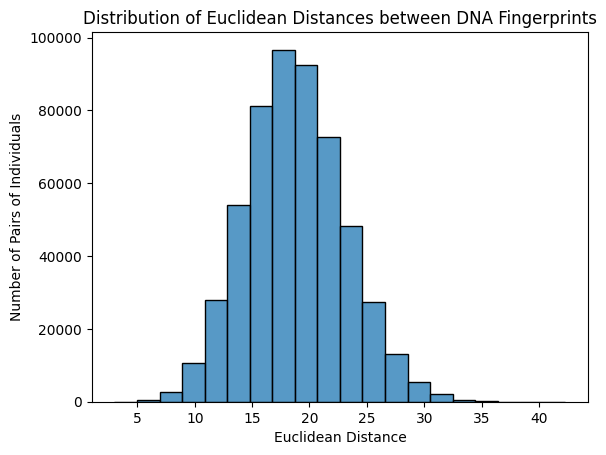

In [28]:
#Problem 5b
ax = sns.histplot(distances, bins=20)
ax.set_title("Distribution of Euclidean Distances between DNA Fingerprints")
ax.set_xlabel("Euclidean Distance")
ax.set_ylabel("Number of Pairs of Individuals")

<!-- END QUESTION -->

<font color = #d14d0f>**QUESTION 6a**:</font> Adapt your code from Question 5a so that it determines the row indices of the individuals with the shortest Euclidean distance. The row indices of the individuals should be saved in `identity_1` and `identity_2`, and the distance between them should be saved in `shortest_dist`.  

> **Note:** It may take around a minute for the cell to run.  

> In our testing of the lab in 2025, we find that this cell, even when properly coded, may sometimes crash the Kernel. If this happens, please restart and re-run your cells.


In [29]:
#Question 6a
shortest_dist = np.inf #Initializes the shortest_distance as infinity
identity_1 = 0 #Initializes the identity of the first individual
identity_2 = 0 #Initializes the identity of the

for i in range(CODIS_profiles.shape[0]):
    for j in range(i+1, CODIS_profiles.shape[0]):
        distance = euclideanDist(CODIS_profiles.iloc[i], CODIS_profiles.iloc[j])
        if distance < shortest_dist:
            shortest_dist = distance
            identity_1 = i
            identity_2 = j

print(f"""Individuals {identity_1} and {identity_2} have the shortest Euclidean distance of {shortest_dist} units.""")

Individuals 3 and 730 have the shortest Euclidean distance of 3.0 units.


In [30]:
grader.check("q6a")

q6a results: All test cases passed!

<font color = #d14d0f>**QUESTION 6b**:</font> Create the DataFrame `id_comparison` to allow you to manually compare the STR counts of the two individuals determined in Question 6a. The DataFrame indices should be the STR loci, and it should have two columns: `"Person 1"` and `"Person 2"`, which include the STR counts for the individuals. The `"Person 1"` column should contain data from the person with the lower index number.

In [31]:
#Question 6b
id_comparison = pd.DataFrame({"Person 1": CODIS_profiles.iloc[identity_1], "Person 2": CODIS_profiles.iloc[identity_2]})

id_comparison

,Person 1,Person 2
TPOX,8.0,8.0
D3S1358,15.0,15.0
FGA,21.0,21.0
D5S818,11.0,11.0
CSF1PO,10.0,10.0
D7S820,11.0,11.0
D8S1179,12.0,12.0
TH01,6.0,6.0
vWA,17.0,18.0
D13S317,11.0,11.0


In [32]:
grader.check("q6b")

q6b results: All test cases passed!

## Diploidy

So far, we only looked at the STR lenght of an allele on one chromosome the shorter alleles for our probability calculations. The original `raw_profiles` DataFrame contains STR alleles for the both chromosomes. The individual's STR count at the same STR locus on their second chromosome is in columns that end with ".1". In this section, we are going to also be considering diploid profiles.  

<font color = #d14d0f>**QUESTION 7a**:</font> 
## Creating a Diploid STR Profile DataFrame

From the original `raw_profiles` DataFrame, you need to create a DataFrame `diploid_profiles` that contains the STR profiles of both chromosomes for each of the original 13 CODIS core loci. 

The `diploid_profiles` DataFrame should have **26 columns**, as each of the original **13 loci** (stored in `CODIS_13_loci`) has two associated values (one for each chromosome). 

### Step 1: Generate the List of 26 Column Names

First, create a list `CODIS_13_loci_diploid_iterated` that contains the required **26 column names**. This can be done by iterating through `CODIS_13_loci` and appending an additional column name with a `".1"` suffix for each locus.

### Next...List and Nested List Comprehensions in Python

We’re now going to create the `CODIS_13_loci_diploid` list in a more **Pythonic** way using a list comprehension.  

A **list comprehension** is a concise way to create a list by applying an expression to each item in an iterable, optionally filtering elements.  

A **nested list comprehension** extends this by processing multi-dimensional data in a single step.  

The code here uses a **nested list comprehension** to iterate over all the original 13 column headers, producing all pairs of old and new column headers. This is then flattened into a regular list containing all the column headers we need.  

For more details, check out the [Python Docs on List Comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).


We save the value in **`CODIS_13_loci_diploid_list_comprehension`**.


In [33]:
CODIS_13_loci_diploid_iterated = []

# Iterate through each locus in CODIS_13_loci to generate the list of 26 column names

for locus in  CODIS_13_loci:
    second_chr_loci =  locus + ".1"
    CODIS_13_loci_diploid_iterated.append(locus) #First chromosome label
    CODIS_13_loci_diploid_iterated.append(second_chr_loci) #Second chromosome label

#This should yeild column names
print(CODIS_13_loci_diploid_iterated)

['TPOX', 'TPOX.1', 'D3S1358', 'D3S1358.1', 'FGA', 'FGA.1', 'D5S818', 'D5S818.1', 'CSF1PO', 'CSF1PO.1', 'D7S820', 'D7S820.1', 'D8S1179', 'D8S1179.1', 'TH01', 'TH01.1', 'vWA', 'vWA.1', 'D13S317', 'D13S317.1', 'D16S539', 'D16S539.1', 'D18S51', 'D18S51.1', 'D21S11', 'D21S11.1']


In [34]:
#Just run this list comprehension 
CODIS_13_loci_diploid_list_comprehension = [item for locus in CODIS_13_loci for item in (locus, locus + ".1")]
print(CODIS_13_loci_diploid_list_comprehension)

['TPOX', 'TPOX.1', 'D3S1358', 'D3S1358.1', 'FGA', 'FGA.1', 'D5S818', 'D5S818.1', 'CSF1PO', 'CSF1PO.1', 'D7S820', 'D7S820.1', 'D8S1179', 'D8S1179.1', 'TH01', 'TH01.1', 'vWA', 'vWA.1', 'D13S317', 'D13S317.1', 'D16S539', 'D16S539.1', 'D18S51', 'D18S51.1', 'D21S11', 'D21S11.1']


<font color = #d14d0f>**QUESTION 7b**:</font> 
##### Creating the `diploid_profiles` DataFrame

Now, create the DataFrame **`diploid_profiles`** with the needed 26 columns from **`raw_profiles`**, making use of the list **`CODIS_13_loci_diploid_iterated`** or **`CODIS_13_loci_diploid_comprehension`**.



In [35]:
#Assign the new columns as part of the Data frame
diploid_profiles = raw_profiles[CODIS_13_loci_diploid_list_comprehension]
diploid_profiles.head()  

,TPOX,TPOX.1,D3S1358,D3S1358.1,FGA,FGA.1,D5S818,D5S818.1,CSF1PO,CSF1PO.1,...,vWA,vWA.1,D13S317,D13S317.1,D16S539,D16S539.1,D18S51,D18S51.1,D21S11,D21S11.1
0,8,8,14.0,17,24.0,24.0,10,11,11,13,...,17,17,13,13,8,12,13.0,15.0,28.0,30.0
1,8,12,16.0,18,25.0,26.0,11,12,10,12,...,14,19,10,11,10,10,16.0,18.0,30.0,33.2
2,8,11,14.0,17,23.0,25.0,11,12,11,15,...,16,17,11,12,12,12,17.0,17.0,30.2,32.2
3,8,8,15.0,18,21.0,21.0,11,12,10,12,...,17,18,11,11,12,13,15.0,17.0,30.0,31.0
4,9,11,15.0,16,19.0,21.0,9,12,10,12,...,16,18,11,11,11,12,14.0,19.0,31.2,32.2


In [36]:
grader.check("q7")

q7 results: All test cases passed!

<!-- BEGIN QUESTION -->
<font color = #d14d0f>**QUESTION 8**:</font> Create an overlaid bar chart that shows the STR count distribution of both TPOX and TPOX.1. Make sure to set an appropriate binwidth, title, legend, and axes labels.

Text(0, 0.5, 'Str Count')

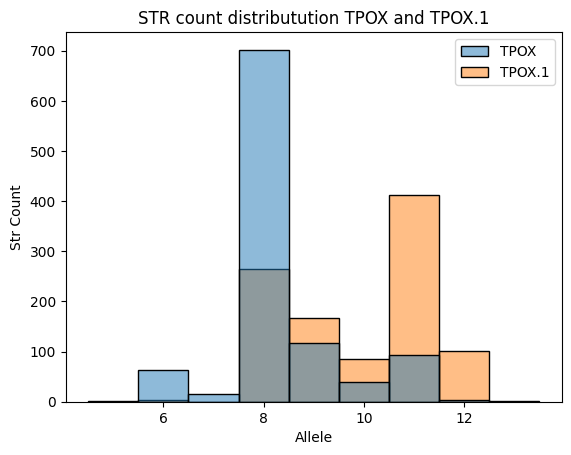

In [37]:
ax = sns.histplot(diploid_profiles[["TPOX", "TPOX.1"]], binwidth=20, discrete=True)
ax.set_title("STR count distributution TPOX and TPOX.1")
ax.set_xlabel("Allele")
ax.set_ylabel("Str Count")

<!-- END QUESTION -->

<font color = #d14d0f>**QUESTION 9**:</font> Create a DataFrame `tpox_diploid_counts`, which shows the distribution frequency of each combination of alleles for TPOX. It should have two index columns `"TPOX"` and `"TPOX.1"`, containing the alleles, and one column called `"count"`, containing the number of individuals in `diploid_profiles` with that combination of alleles. The DataFrame should also be sorted in descending order by the `"count"` column.

>Hint:  <br>
    - You may want to slightly modify the example code that is provided before Question 3. <br>
    - Feel free to use multiple lines of code, as long as your final DataFrame is `tpox_diploid_counts`. 

>Note:  <br>
    - You might notice that the output DataFrame shows what appear as blank spaces for "TPOX" in the first column. These are just merged cells that indicate the block of empty rows share the same value.

In [38]:
tpox_diploid_counts = diploid_profiles.groupby(["TPOX", "TPOX.1"]).size().reset_index(name="count")
tpox_diploid_counts.set_index(["TPOX", "TPOX.1"], inplace=True)
tpox_diploid_counts.sort_values(by='count', ascending=False, inplace=True)
#Do not change this line
tpox_diploid_counts.head(10)

count
TPOX TPOX.1       
8    11        241
     8         233
     9         127
9    11         65
11   11         58
8    10         57
     12         44
11   12         36
10   11         31
9    9          22

In [39]:
grader.check("q9")

q9 results: All test cases passed!

<font color = #d14d0f>**QUESTION 10a**:</font> Create a DataFrame `STR_combinations`, which has three columns `"STR locus"`, `"Most Common Allele Combination"` and `"Probability"`. For each of the 13 loci, determine the most commonly observed pair of alleles and the probability (as a proportion) that a random individual would have that pair of alleles. The most common allele combination of a locus should be formatted as "(allele_1, allele_2)" as a string. The probability should be rounded to 2 decimal places.

>Hint:  <br>
    - You may want to consider how you can apply the DataFrame in Question 9. <br>
    - `df.index.values` will extract the indices of a DataFrame as an array. If there are multiple layers of indices, it they be output as an array of tuples. <br>
    - You do not have to follow the skeleton code provided.

In [41]:
STR_combinations = pd.DataFrame({"STR locus": [],
                                "Most Common Allele Combination": [],
                                "Probability": []})

for locus in CODIS_13_loci:
    diploid_counts = diploid_profiles.groupby([locus, locus + ".1"]).size().reset_index(name="count")
    most_common_allele_combination = diploid_counts.sort_values(by="count", ascending=False).iloc[0]
    most_common_count = most_common_allele_combination["count"]
    most_common_proportion = round(most_common_count / diploid_counts["count"].sum(), 2)
    STR_combinations.loc[len(STR_combinations)] = [locus,
                                                    f"({most_common_allele_combination[locus]}, {most_common_allele_combination[locus + '.1']})",
                                                    most_common_proportion]


STR_combinations

,STR locus,Most Common Allele Combination,Probability
0,TPOX,"(8, 11)",0.23
1,D3S1358,"(15.0, 16.0)",0.17
2,FGA,"(21.0, 22.0)",0.07
3,D5S818,"(11, 12)",0.23
4,CSF1PO,"(11, 12)",0.18
5,D7S820,"(10.0, 11.0)",0.15
6,D8S1179,"(13, 14)",0.12
7,TH01,"(6.0, 7.0)",0.12
8,vWA,"(16, 17)",0.12
9,D13S317,"(11, 12)",0.18


In [42]:
diploid_profiles.columns

Index(['TPOX', 'TPOX.1', 'D3S1358', 'D3S1358.1', 'FGA', 'FGA.1', 'D5S818',
       'D5S818.1', 'CSF1PO', 'CSF1PO.1', 'D7S820', 'D7S820.1', 'D8S1179',
       'D8S1179.1', 'TH01', 'TH01.1', 'vWA', 'vWA.1', 'D13S317', 'D13S317.1',
       'D16S539', 'D16S539.1', 'D18S51', 'D18S51.1', 'D21S11', 'D21S11.1'],
      dtype='object')

In [43]:
grader.check("q10a")

q10a results:
    q10a - 1 result:
        ✅ Test case passed

    q10a - 2 result:
        ✅ Test case passed

    q10a - 3 result:
        ❌ Test case failed
        Trying:
            len(str(sorted(STR_combinations['Probability'])[0]))
        Expecting:
            7
        **********************************************************************
        Line 1, in q10a 2
        Failed example:
            len(str(sorted(STR_combinations['Probability'])[0]))
        Expected:
            7
        Got:
            4

<font color = #d14d0f>**QUESTION 10b**:</font> Calculate the probability that a random individual has the most common allele pair combination for all of the 13 STR loci and assign your result to `probability_most_common_combination`.

In [44]:
probability_most_common_combination = np.prod(STR_combinations["Probability"])
print(f"The probability that a random individual has the most common allele pair combination for each of the 13 STR loci is {probability_most_common_combination:.3e}.")

The probability that a random individual has the most common allele pair combination for each of the 13 STR loci is 3.569e-12.


In [45]:
grader.check("q10b")

q10b results: All test cases passed!

<font color = #d14d0f>**QUESTION 10c**:</font> How does your answer in 10a relate to the world population and why does this matter?

**Answer 10c**: The most common allele combinations are not universal across all populations. If we ignore population structure, forensic DNA match may overestimate or undersestimate probabilities potentially leading to wrongful convictions. In short this matters because understanding population genetics is really important for precise interpretation DNA evidence in forensic science 

<!-- END QUESTION -->


---

### Congratulations! You have finished the notebook! ##

---

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Save, then download the zip file and submit it to the Gradescope autograder assignment. Then, extract the written solutions PDF and upload to the written work lab assignment.

In [50]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1 results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q4a results: All test cases passed!

    q4b results: All test cases passed!

    q4c results: All test cases passed!

    q5a results: All test cases passed!

    q6a results: All test cases passed!

    q6b results: All test cases passed!

    q7 results: All test cases passed!

    q9 results: All test cases passed!

    q10a results:
        q10a - 1 result:
            ✅ Test case passed

        q10a - 2 result:
            ✅ Test case passed

        q10a - 3 result:
            ❌ Test case failed
            Trying:
                len(str(sorted(STR_combinations['Probability'])[0]))
            Expecting:
                7
            **********************************************************************
          